<a href="https://colab.research.google.com/github/davipguimaraes/Imers-o-de-dados---alura/blob/main/04_Imers%C3%A3o_Python_Tabela_de_a%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install mplfinance

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [56]:
df_original = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')

df_main = df_original.copy()
df_main.columns = ['abertura', 'max', 'min', 'fechamento', 'fechamento_ajuste', 'volume']

[*********************100%%**********************]  1 of 1 completed


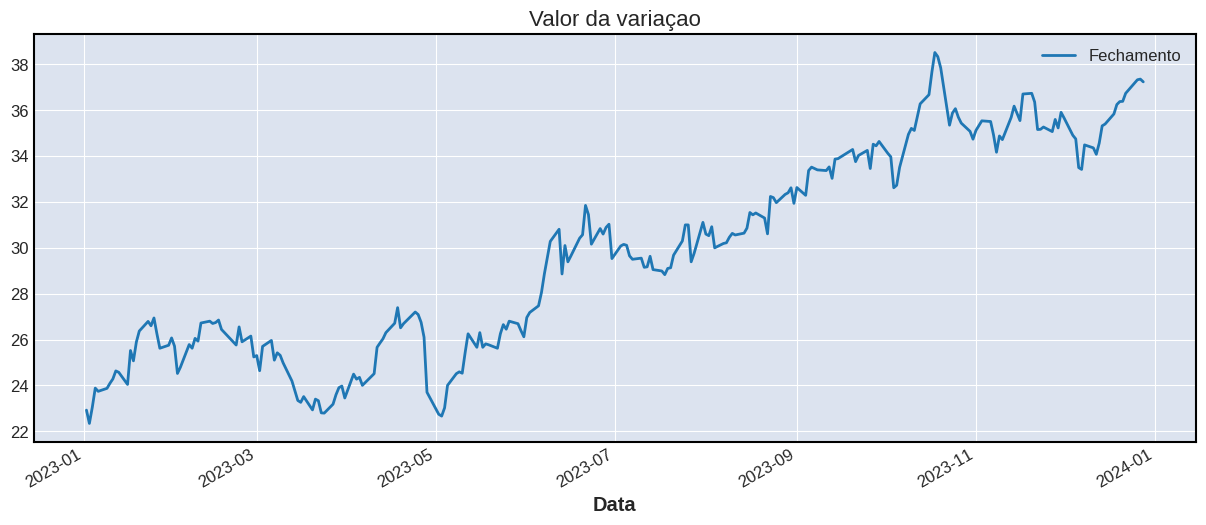

In [57]:
df_main = df_main.rename_axis('Data')
df_main['fechamento'].plot(figsize=(15,6))
plt.title("Valor da variaçao", fontsize=16)
plt.legend(['Fechamento'])

# Grafico de velas fixo

In [58]:

df_data = df_main.head(60).copy()

# Convertendo o índice em uma coluna de data
df_data['Data'] = df_data.index

# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df_data['Data'] = df_data['Data'].apply(mdates.date2num)


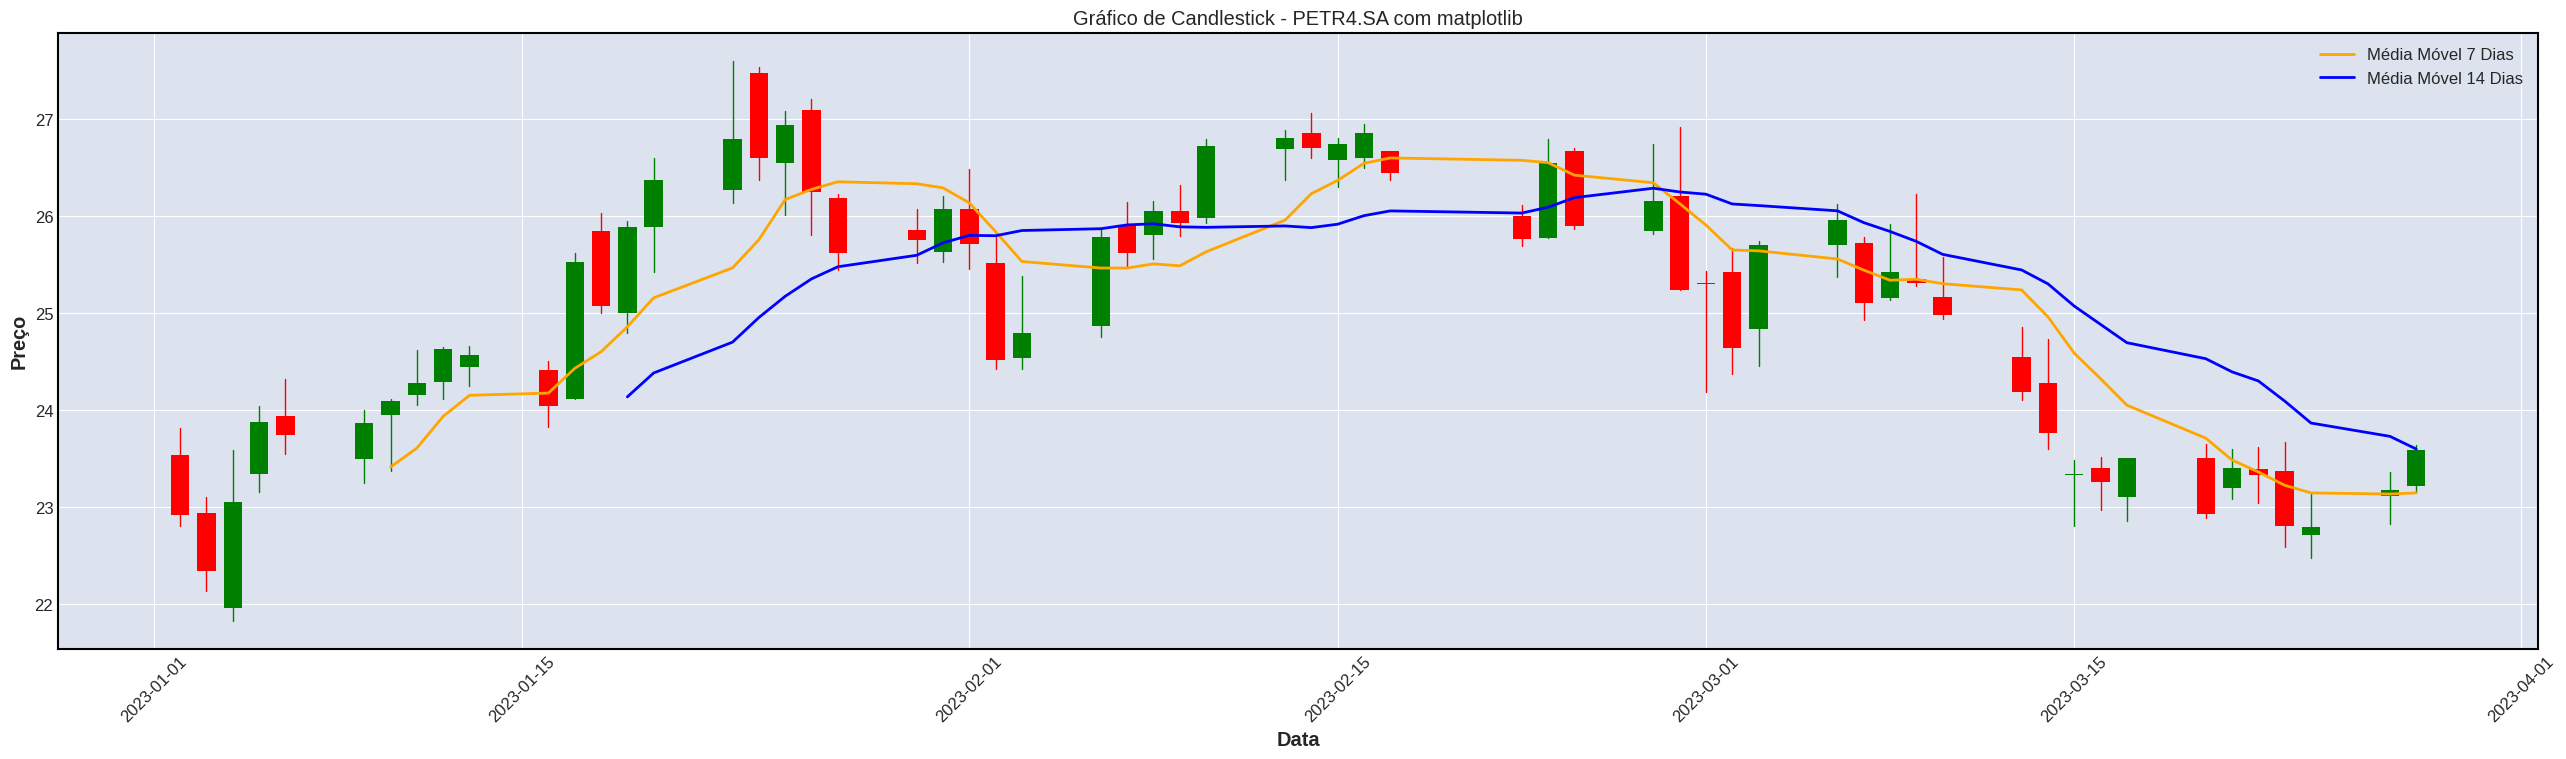

In [59]:
fig, ax = plt.subplots(figsize=(32, 8))

# Vamos definir a largura dos candles no gráfico
width = 0.7


for i in range(len(df_data)):
    # Determinando a cor do candle
    # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
    # Se for menor, o candle é vermelho (a ação desvalorizou).
    if df_data['fechamento'].iloc[i] > df_data['abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [df_data['Data'].iloc[i], df_data['Data'].iloc[i]] define o ponto x da linha (a data), e [df_data['Mínimo'].iloc[i], df_data['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df_data['Data'].iloc[i], df_data['Data'].iloc[i]],
            [df_data['min'].iloc[i], df_data['max'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df_data['Data'].iloc[i] - width/2, min(df_data['abertura'].iloc[i], df_data['fechamento'].iloc[i])),
                            width,
                            abs(df_data['fechamento'].iloc[i] - df_data['abertura'].iloc[i]),
                            facecolor=color))

df_data['MA7'] = df_data['fechamento'].rolling(window=7).mean()
df_data['MA14'] = df_data['fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df_data['Data'], df_data['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df_data['Data'], df_data['MA14'], color='blue', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

## # Grafico de velas interativo

In [60]:

# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])


'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df_data.index,
                             open=df_data['abertura'],
                             high=df_data['max'],
                             low=df_data['min'],
                             close=df_data['fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df_data.index,
                         y=df_data['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df_data.index,
                         y=df_data['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df_data.index,
                     y=df_data['volume'],
                     name='volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1920, height=600)
# Mostrando o gráfico
fig.show()

# Grafico de velas com MPF

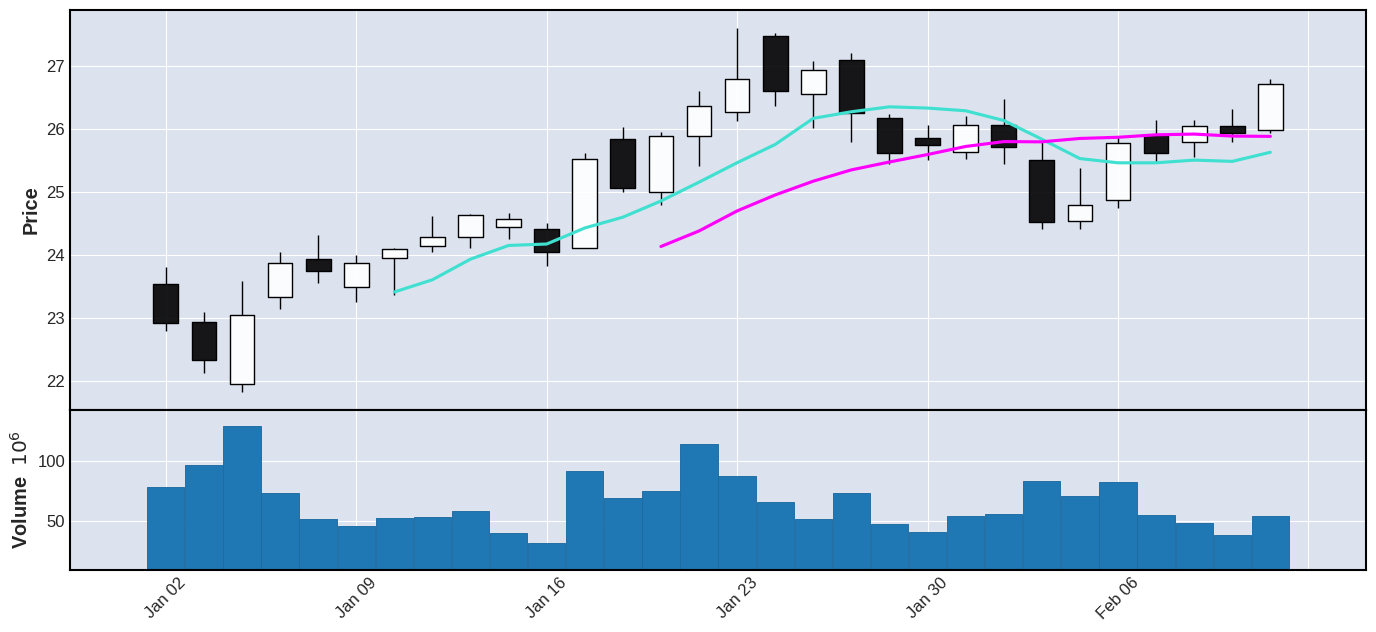

In [61]:
mpf.plot(df_original.head(30), type='candle', figsize = (18,8), volume=True, mav=(7,14))